In [7]:
import numpy as np
from sklearn.cluster import KMeans
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

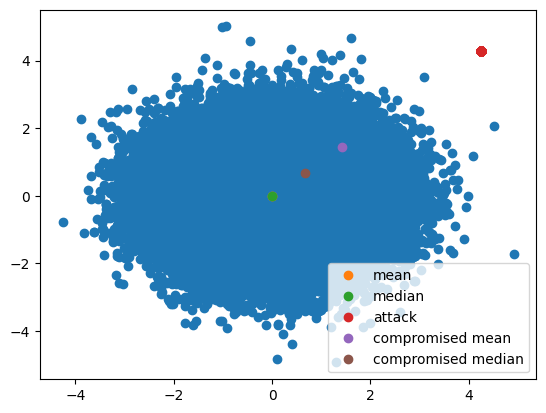

In [28]:
rng = np.random.default_rng(42)
npoints = 100000
nattackpoints = npoints // 2
s = npoints // 2 + 1 - nattackpoints
zmax = sp.stats.norm.ppf((npoints - s) / npoints)

X = rng.normal(size=(npoints, 2))
attack_X = np.tile(X.mean(axis=0) + zmax * X.std(axis=0), (nattackpoints, 1))
compromised_X = np.concatenate((X, attack_X))

plt.plot(X[:,0], X[:,1], 'o')
X_mean = X.mean(axis=0)
plt.plot(X_mean[0], X_mean[1], 'o', label="mean")
X_median = np.median(X, axis=0)
plt.plot(X_median[0], X_median[1], 'o', label="median")
plt.plot(attack_X[:,0], attack_X[:,1], 'o', label="attack")

cX_mean = compromised_X.mean(axis=0)
plt.plot(cX_mean[0], cX_mean[1], 'o', label="compromised mean")
cX_median = np.median(compromised_X, axis=0)
plt.plot(cX_median[0], cX_median[1], 'o', label="compromised median")

plt.legend()
plt.show()

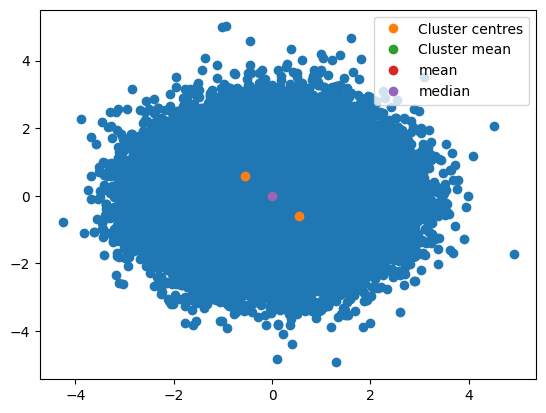

In [29]:
model = KMeans(2, n_init='auto').fit(X)
plt.plot(X[:,0], X[:,1], 'o')
plt.plot(model.cluster_centers_[:,0], model.cluster_centers_[:,1], 'o', label="Cluster centres")
cluster_mean = np.mean(model.cluster_centers_, axis=0)
plt.plot(cluster_mean[0], cluster_mean[1], 'o', label="Cluster mean")
X_mean = X.mean(axis=0)
plt.plot(X_mean[0], X_mean[1], 'o', label="mean")
X_median = np.median(X, axis=0)
plt.plot(X_median[0], X_median[1], 'o', label="median")
plt.legend()
plt.show()

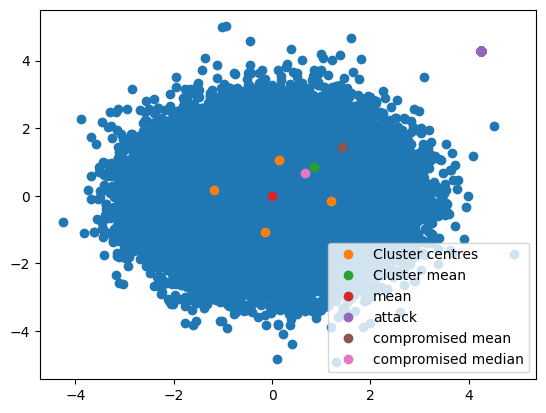

In [32]:
model = KMeans(5, n_init='auto').fit(compromised_X)
plt.plot(X[:,0], X[:,1], 'o')
plt.plot(model.cluster_centers_[:,0], model.cluster_centers_[:,1], 'o', label="Cluster centres")
cluster_mean = np.mean(model.cluster_centers_, axis=0)
plt.plot(cluster_mean[0], cluster_mean[1], 'o', label="Cluster mean")

X_mean = X.mean(axis=0)
plt.plot(X_mean[0], X_mean[1], 'o', label="mean")
X_median = np.median(X, axis=0)
# plt.plot(X_median[0], X_median[1], 'o', label="median")
plt.plot(attack_X[:,0], attack_X[:,1], 'o', label="attack")

cX_mean = compromised_X.mean(axis=0)
plt.plot(cX_mean[0], cX_mean[1], 'o', label="compromised mean")
cX_median = np.median(compromised_X, axis=0)
plt.plot(cX_median[0], cX_median[1], 'o', label="compromised median")

plt.legend()
plt.show()

In [39]:
from sklearn.mixture import GaussianMixture

In [50]:
model = GaussianMixture(n_components=5, covariance_type="spherical").fit(compromised_X)
np.mean(model.means_, axis=0)

array([0.84781109, 0.85779134])

In [44]:
X.mean(axis=0)

array([-0.00221187,  0.00069621])